In [1]:
from textblob import TextBlob as txt
import nltk as nltk
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
import matplotlib.pyplot as plt
import nltk
from wordcloud import WordCloud
from nltk.corpus import stopwords
import re
import string
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/christian/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
# Data Downloaded from: 
# https://www.kaggle.com/datafiniti/consumer-reviews-of-amazon-products#1429_1.csv   

In [2]:
# display

# centering stuff
from IPython.display import display, HTML
display(HTML("""
<style>
.output {
    display: flex;
    align-items: center;
    text-align: center;
}
</style>
"""))

# data display 
pd.set_option('display.max_rows', 500)
pd.set_option('display.min_rows', 100)
pd.set_option('display.max_columns', 5)
pd.set_option("display.max_colwidth", 150)

In [3]:
# %load useful_functions.py
# Python script 
# File: useful_functions.py
# Author: Christian Brandstätter 
# Contact: bran.chri@gmail.com
# Date: 22.01.2020
# Copyright (C) 2020
# Description: functions created by Benjamin


# Defining Function that cleans a string
def cleanText(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

# Defining a funtion that cleans the Text of Stopwords, which are not relevant to us in this context.
def cleanStopWords(text):
    #Defining the english stop words:
    stopWords = set(stopwords.words('english'))
    textSplitted = text.split(' ')
    cleanedText = ''
    for element in textSplitted:
        if element not in stopWords:
            cleanedText = cleanedText + ' ' + element
    return cleanedText

# Defining Function to create a wordcloud
def wordCloudCreation (text, title='', width= 500, height = 400):
    text_string = ''
    for element in text:
        text_string= text_string + ' ' + element
    stop_words = set(stopwords.words('english'))
    wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",collocations=False,
               max_font_size=150, random_state=42, width=width, height=height, margin = 20)
    
    wc.generate(text_string)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis('off')
    plt.title(title+'\n')
    #plt.show()

#Defining a Function which returns the most common words in a data series.
def wholeReviewTextFromSeries(text):
    wholeReview = ''
    for element in text:
        wholeReview = wholeReview + ' ' + element
    return Counter(wholeReview.split()).most_common()


In [4]:
df = pd.read_csv('file.csv',sep=',')#Import of Data-Set
df.drop(['id','keys','imageURLs','asins'],axis=1,inplace=True)  # Dropping unnecessary Columns

In [5]:
# Data Description
df.columns

Index(['dateAdded', 'dateUpdated', 'name', 'brand', 'categories',
       'primaryCategories', 'manufacturer', 'manufacturerNumber',
       'reviews.date', 'reviews.dateAdded', 'reviews.dateSeen',
       'reviews.doRecommend', 'reviews.id', 'reviews.numHelpful',
       'reviews.rating', 'reviews.sourceURLs', 'reviews.text', 'reviews.title',
       'reviews.username', 'sourceURLs'],
      dtype='object')

In [6]:
# there is some products with duplicates, basically different colors of the same products 
# apparently, reviews also got duplicated; thus the duplicated items should be removed
uniques = list(df.name.unique())

In [7]:
# Data Cleaning: remove review duplicates
dupl_bool = list(pd.Series([x[0:30] for x in uniques]).duplicated())
dupl_bool = [not i for i in dupl_bool]
logic_select_dict = dict(zip(uniques, dupl_bool))

In [24]:
df = df[df.name.map(logic_select_dict)]
df.shape
# 4576 rows remained in the set

(4576, 23)

unfortunately, the categories-column is not very helpful for differentiating data
derived from above, we differentiate the following product classes: 

E-Reader ("Kindle")
Speaker ("Echo", "Tap")
Set-Top-Box ("Fire TV")
Charger ("Charger") 
Tablets ("Tablet") 

In [25]:
# mapping of categories: 
catlist = []
for i in range(0,len(uniques)): 
    if "Tablet" in uniques[i]: 
        catlist.append("Tablet")
    elif "Kindle" in uniques[i]: 
        catlist.append("E-Reader")
    elif "Echo" in uniques[i]: 
        catlist.append("Speaker")
    elif "Tap" in uniques[i]: 
        catlist.append("Speaker")
    elif "Fire TV" in uniques[i]: 
        catlist.append("Set-Top-Box")
    
assert len(catlist) == len(uniques) # simple check

In [26]:
pd.DataFrame(catlist, uniques) # fits
prod_cat_dict = dict(zip(uniques, catlist))

In [27]:
df["prod_cat"] = df.name.map(prod_cat_dict)

In [28]:
# export data with product categories
df.to_pickle("cleandata.pkl")
df.shape

(4576, 23)

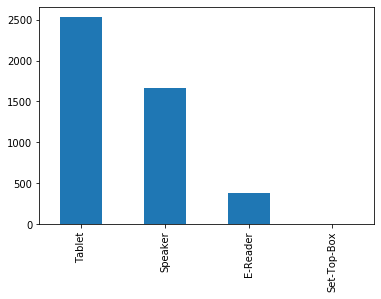

In [29]:
# apparently, the different categories are not equally distributed 
df["prod_cat"].value_counts().plot(kind="bar")

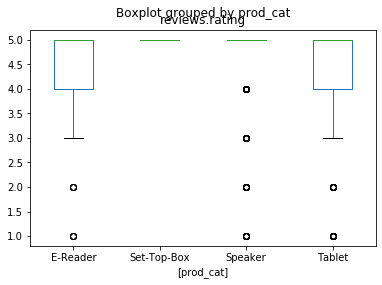

In [30]:
df[["reviews.rating", "prod_cat"]].boxplot(by = "prod_cat", grid = False)
# there is not really a bias for rating per product category 

## Wordclouds for different product categories

In [31]:
ReviewTextCleaned = [cleanText(x) for x in df['reviews.text']]
df['reviewTextCleaned'] = ReviewTextCleaned
df['reviewTextCleanedNoStopWords'] = [cleanStopWords (x) for x in df['reviewTextCleaned']]

In [32]:
Tablet = df[df["prod_cat"] == "Tablet"]
Set_Top_Box = df[df["prod_cat"] == "Set-Top-Box"]
Speaker = df[df["prod_cat"] == "Speaker"]
E_Reader = df[df["prod_cat"] == "E-Reader"]

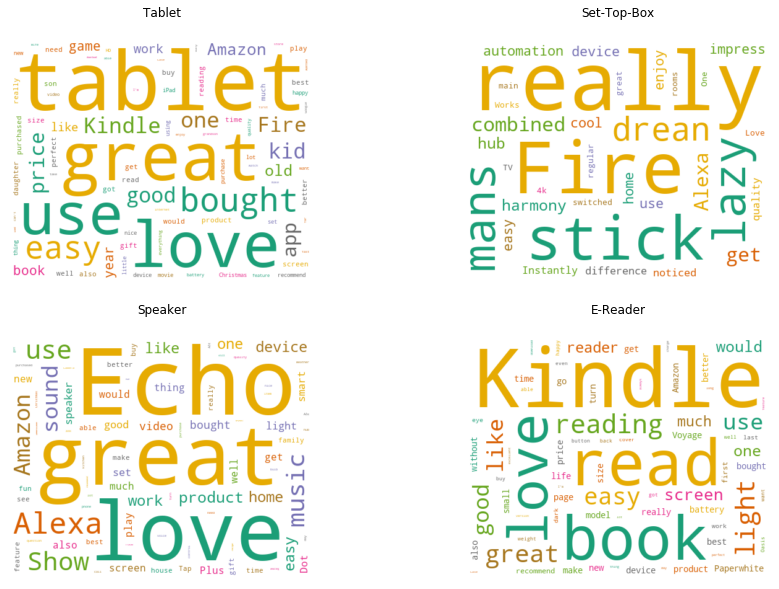

In [33]:
# Wordcloud per Category 

f = plt.figure(figsize=(15,10))
ax = f.add_subplot(221)
wordCloudCreation(Tablet['reviews.text'], "Tablet")
ax2 = f.add_subplot(222)
wordCloudCreation(Set_Top_Box['reviews.text'], "Set-Top-Box")
ax3 = f.add_subplot(223)
wordCloudCreation(Speaker['reviews.text'], "Speaker")
ax4 = f.add_subplot(224)
wordCloudCreation(E_Reader['reviews.text'], "E-Reader")